In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
# classification_report : 주요 분류 측정 항목 보여줌. confusion_matrix : 분류의 정확성 평가위한 오차행렬 계산 모듈
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# r language의 rpart()와 같이 python의 scikit-learn package에 의사결정트리 분류, 회귀모델 구현되어있음.

import pandas as pd
import numpy as np

import glob
import sys

import os

-----
# .1

-----
## Make dataset

In [4]:
path = "/content/gdrive/MyDrive/wine_dataset"
file_list = os.listdir(path)
print(file_list)

['wine_test.csv', 'wine.csv']


In [5]:
df_wine = pd.read_csv("/content/gdrive/MyDrive/wine_dataset/wine.csv")

print(df_wine)

   wine  alcohol  acid  ash1  ash2  magnesium  phenol  flavanoids  color   hue
0     A    14.23  1.71  2.43  15.6        127    2.80        3.06   5.64  1.04
1     A    13.20  1.78  2.14  11.2        100    2.65        2.76   4.38  1.05
2     A    13.16  2.36  2.67  18.6        101    2.80        3.24   5.68  1.03
3     A    14.37  1.95  2.50  16.8        113    3.85        3.49   7.80  0.86
4     A    13.24  2.59  2.87  21.0        118    2.80        2.69   4.32  1.04
..  ...      ...   ...   ...   ...        ...     ...         ...    ...   ...
75    B    11.62  1.99  2.28  18.0         98    3.02        2.26   3.25  1.16
76    B    12.47  1.52  2.20  19.0        162    2.50        2.27   2.60  1.16
77    B    11.81  2.12  2.74  21.5        134    1.60        0.99   2.50  0.95
78    B    12.29  1.41  1.98  16.0         85    2.55        2.50   2.90  1.23
79    B    12.37  1.07  2.10  18.5         88    3.52        3.75   4.50  1.04

[80 rows x 10 columns]


In [6]:
df_wine.wine = df_wine.replace('A', 0)
df_wine.wine = df_wine.replace('B', 1)

df_wine

# it is good to change string to number in decision tree

,wine,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
0,0.0,14.23,1.71,2.43,15.6,127,2.80,3.06,5.64,1.04
1,0.0,13.20,1.78,2.14,11.2,100,2.65,2.76,4.38,1.05
2,0.0,13.16,2.36,2.67,18.6,101,2.80,3.24,5.68,1.03
3,0.0,14.37,1.95,2.50,16.8,113,3.85,3.49,7.80,0.86
4,0.0,13.24,2.59,2.87,21.0,118,2.80,2.69,4.32,1.04
...,...,...,...,...,...,...,...,...,...,...
75,1.0,11.62,1.99,2.28,18.0,98,3.02,2.26,3.25,1.16
76,1.0,12.47,1.52,2.20,19.0,162,2.50,2.27,2.60,1.16
77,1.0,11.81,2.12,2.74,21.5,134,1.60,0.99,2.50,0.95
78,1.0,12.29,1.41,1.98,16.0,85,2.55,2.50,2.90,1.23


In [7]:
x = pd.DataFrame(df_wine, columns=['alcohol','acid','ash1','ash2','magnesium','phenol','flavanoids','color','hue']) # constituents
x = np.array(x)

y = pd.DataFrame(df_wine, columns=['wine']) # class (A = 0, B = 1)
y = np.array(y)



In [8]:
x, y

(array([[ 14.23 ,   1.71 ,   2.43 ,  15.6  , 127.   ,   2.8  ,   3.06 ,
           5.64 ,   1.04 ],
        [ 13.2  ,   1.78 ,   2.14 ,  11.2  , 100.   ,   2.65 ,   2.76 ,
           4.38 ,   1.05 ],
        [ 13.16 ,   2.36 ,   2.67 ,  18.6  , 101.   ,   2.8  ,   3.24 ,
           5.68 ,   1.03 ],
        [ 14.37 ,   1.95 ,   2.5  ,  16.8  , 113.   ,   3.85 ,   3.49 ,
           7.8  ,   0.86 ],
        [ 13.24 ,   2.59 ,   2.87 ,  21.   , 118.   ,   2.8  ,   2.69 ,
           4.32 ,   1.04 ],
        [ 14.2  ,   1.76 ,   2.45 ,  15.2  , 112.   ,   3.27 ,   3.39 ,
           6.75 ,   1.05 ],
        [ 14.39 ,   1.87 ,   2.45 ,  14.6  ,  96.   ,   2.5  ,   2.52 ,
           5.25 ,   1.02 ],
        [ 14.06 ,   2.15 ,   2.61 ,  17.6  , 121.   ,   2.6  ,   2.51 ,
           5.05 ,   1.06 ],
        [ 14.83 ,   1.64 ,   2.17 ,  14.   ,  97.   ,   2.8  ,   2.98 ,
           5.2  ,   1.08 ],
        [ 13.86 ,   1.35 ,   2.27 ,  16.   ,  98.   ,   2.98 ,   3.15 ,
           7.22 ,   1.01 ],


-----

## Make model

In [27]:
decision_tree_clf = DecisionTreeClassifier() #load module 

decision_tree_clf = decision_tree_clf.fit(x, y) # train decisiontreeclassfier model with data

decision_tree_prediction = decision_tree_clf.predict(x) # predict with model

In [28]:
decision_tree_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
print(decision_tree_clf.score(x, y)) # win.csv data에 대하여 100% 정확도로 훈련되었다.

# misclassification rate = 0

1.0


-----

## Plot model

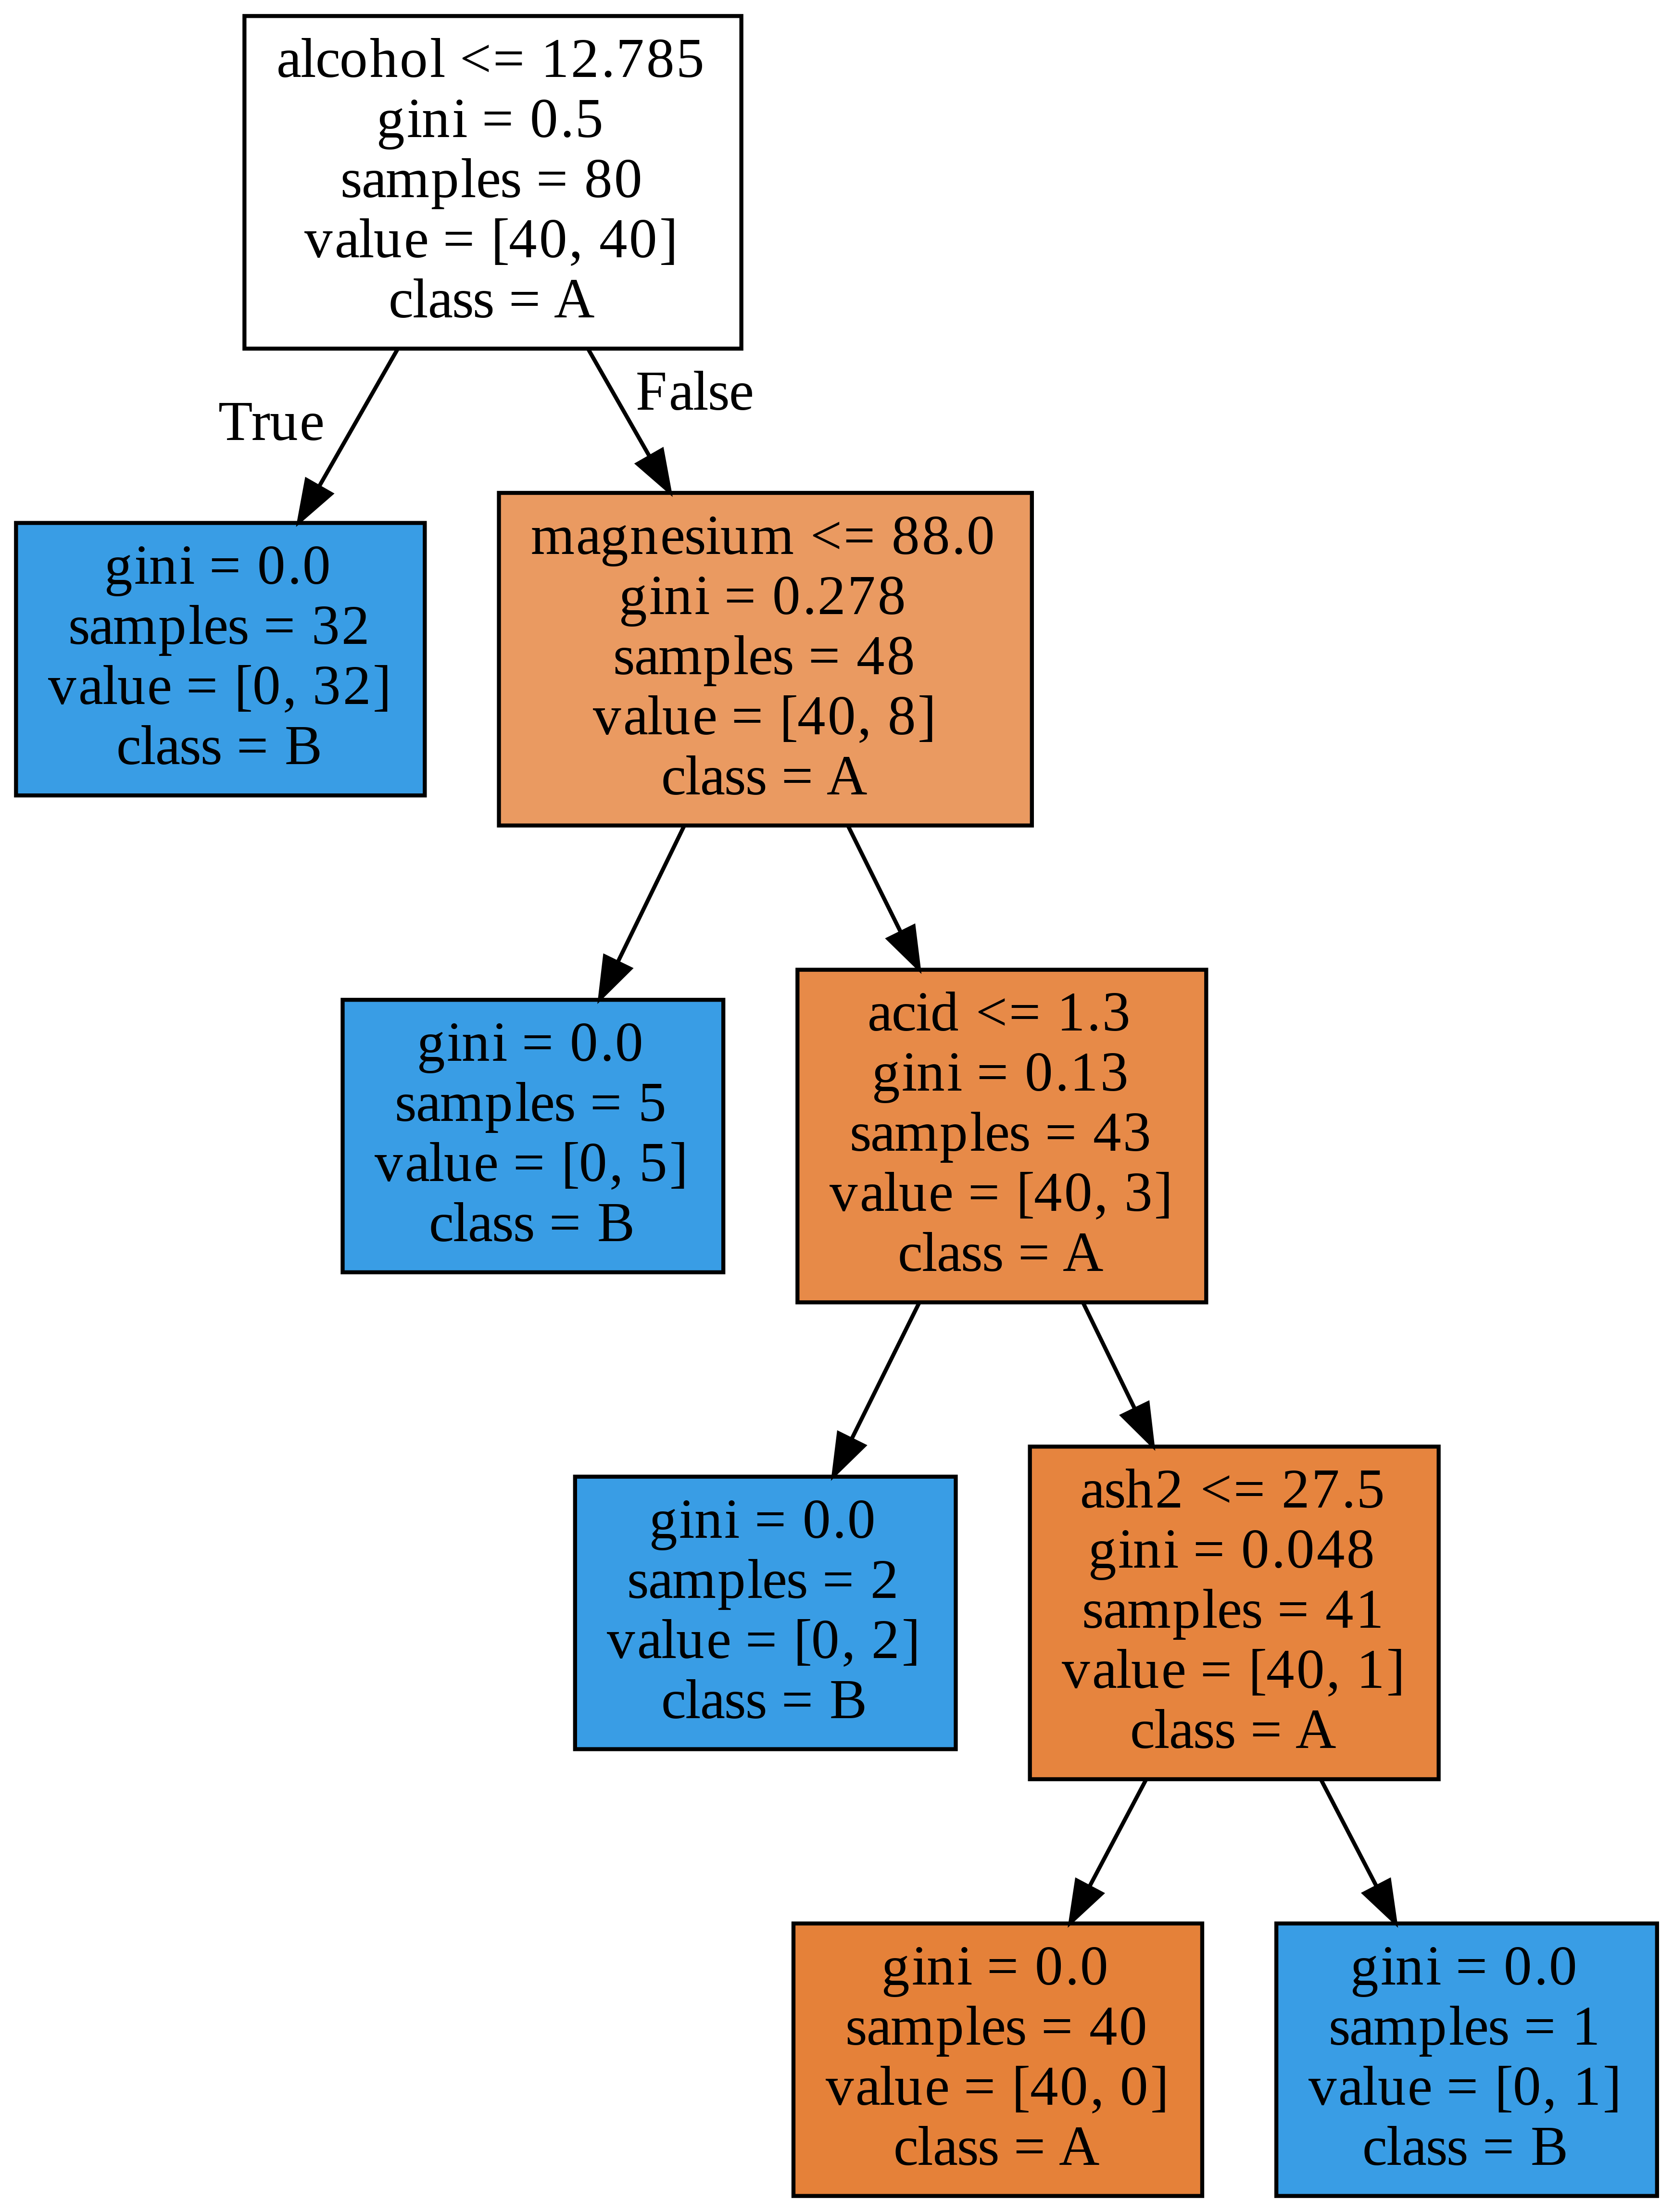

In [30]:
from sklearn.tree import export_graphviz # I chooce graphviz to plot graph, because it is good to visualize tree. 
from subprocess import call
from IPython.display import Image

feature_names = df_wine.columns.tolist()
feature_names = feature_names[1:10]
target_name = np.array(['A', 'B'])

export_graphviz(decision_tree_clf, 
                out_file='tree.dot',
                feature_names = feature_names,
                class_names = target_name,
                filled = True)


call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion_tree.png', '-Gdpi=600'])
# .dot to .png

Image(filename = 'decistion_tree.png')
# show image

------
## Model analysis

1. Which variables are the most important to classify the types of wines?

2. select two most important variables and plot the wine data (training set) on the two-dimensional space of the selected variables. Distinct types of wines by coloring the observations with two colors.


1. scikit-learn을 이용하면 각 node의 gini impurity(지니 불순도)를 구할 수 있습니다.

불순도를 이용하여 각 노드의 중요도(node importance)를 계산하고 노드 중요도를 이용하여 각 variables(features)의 중요도를 구해보면 **'alcohol'** 첫번째로 **'magnesium'**이 두번쨰로 wine 의 type을 분류하는데 중요한 변수라는 결과가 나옵니다.

노드 중요도는 부모노드의 가중치 불순도에서 자식 노드들의 가중치 불순도 합을 뺀 것으로 노드 중요도가 클수록 그 노드에서 불순도가 크게 감소한다는 것을 의미하며,
<br/>
variable의 중요도는 전체 노드의 중요도를 합한 것 대비 특정 variable에 의해 갈라진 노드들의 중요도를 합한 것으로 이 값이 클수록 variable이 분류과정에서 큰 역할을 가졌다고 볼 수 있습니다.




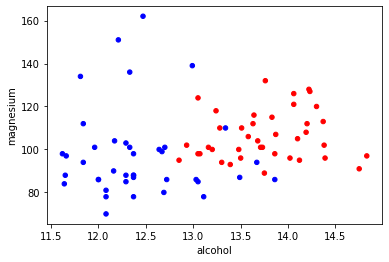

In [34]:
# 2
from matplotlib import pyplot as plt

graph = pd.DataFrame(df_wine, columns=['alcohol','magnesium','wine']) 

A = graph[graph["wine"]==0.0].index
B = graph[graph["wine"]==1.0].index

graph.loc[A,"color"] = "r"
graph.loc[B,"color"] = "b"

# wine A = red
# wine B = blue

graph.plot.scatter(x='alcohol', y='magnesium', c=graph['color'])
plt.show()

# x  = alcohol
# y = magnesium

-------
## Test model

In [31]:
df_wine_test = pd.read_csv("/content/gdrive/MyDrive/wine_dataset/wine_test.csv")

print(df_wine_test)

    alcohol  acid  ash1  ash2  magnesium  phenol  flavanoids  color   hue
0     13.56  1.71  2.31  16.2        117    3.15        3.29   6.13  0.95
1     11.56  2.05  3.23  28.5        119    3.18        5.08   6.00  0.93
2     13.88  1.89  2.59  15.0        101    3.25        3.56   5.43  0.88
3     13.24  3.98  2.29  17.5        103    2.64        2.63   4.36  0.82
4     13.90  1.68  2.12  16.0        101    3.10        3.39   6.10  0.91
5     14.10  2.02  2.40  18.8        103    2.75        2.92   6.20  1.07
6     13.94  1.73  2.27  17.4        108    2.88        3.54   8.90  1.12
7     12.00  3.43  2.00  19.0         87    2.00        1.64   1.28  0.93
8     11.45  2.40  2.42  20.0         96    2.90        2.79   3.25  0.80
9     12.42  4.43  2.73  26.5        102    2.20        2.13   2.08  0.92
10    13.05  1.77  2.10  17.0        107    3.00        3.00   5.04  0.88
11    14.21  4.04  2.44  18.9        111    2.85        2.65   5.24  0.87
12    14.38  3.59  2.28  16.0        1

In [32]:
x_test = pd.DataFrame(df_wine_test, columns=['alcohol','acid','ash1','ash2','magnesium','phenol','flavanoids','color','hue']) # constituents
x_test = np.array(x_test)
x_test

array([[ 13.56,   1.71,   2.31,  16.2 , 117.  ,   3.15,   3.29,   6.13,
          0.95],
       [ 11.56,   2.05,   3.23,  28.5 , 119.  ,   3.18,   5.08,   6.  ,
          0.93],
       [ 13.88,   1.89,   2.59,  15.  , 101.  ,   3.25,   3.56,   5.43,
          0.88],
       [ 13.24,   3.98,   2.29,  17.5 , 103.  ,   2.64,   2.63,   4.36,
          0.82],
       [ 13.9 ,   1.68,   2.12,  16.  , 101.  ,   3.1 ,   3.39,   6.1 ,
          0.91],
       [ 14.1 ,   2.02,   2.4 ,  18.8 , 103.  ,   2.75,   2.92,   6.2 ,
          1.07],
       [ 13.94,   1.73,   2.27,  17.4 , 108.  ,   2.88,   3.54,   8.9 ,
          1.12],
       [ 12.  ,   3.43,   2.  ,  19.  ,  87.  ,   2.  ,   1.64,   1.28,
          0.93],
       [ 11.45,   2.4 ,   2.42,  20.  ,  96.  ,   2.9 ,   2.79,   3.25,
          0.8 ],
       [ 12.42,   4.43,   2.73,  26.5 , 102.  ,   2.2 ,   2.13,   2.08,
          0.92],
       [ 13.05,   1.77,   2.1 ,  17.  , 107.  ,   3.  ,   3.  ,   5.04,
          0.88],
       [ 14.21,   4.0

In [33]:
decision_tree_prediction = decision_tree_clf.predict(x_test) # predict with model
decision_tree_prediction

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0.])

-------
# .2

-----
## split data

In [51]:
df_wine # wine.csv

,wine,alcohol,acid,ash1,ash2,magnesium,phenol,flavanoids,color,hue
0,0.0,14.23,1.71,2.43,15.6,127,2.80,3.06,5.64,1.04
1,0.0,13.20,1.78,2.14,11.2,100,2.65,2.76,4.38,1.05
2,0.0,13.16,2.36,2.67,18.6,101,2.80,3.24,5.68,1.03
3,0.0,14.37,1.95,2.50,16.8,113,3.85,3.49,7.80,0.86
4,0.0,13.24,2.59,2.87,21.0,118,2.80,2.69,4.32,1.04
...,...,...,...,...,...,...,...,...,...,...
75,1.0,11.62,1.99,2.28,18.0,98,3.02,2.26,3.25,1.16
76,1.0,12.47,1.52,2.20,19.0,162,2.50,2.27,2.60,1.16
77,1.0,11.81,2.12,2.74,21.5,134,1.60,0.99,2.50,0.95
78,1.0,12.29,1.41,1.98,16.0,85,2.55,2.50,2.90,1.23


In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

x_train, x_test, y_train, y_test # split train : test = 3 : 1

(array([[ 12.93 ,   3.8  ,   2.65 ,  18.6  , 102.   ,   2.41 ,   2.41 ,
           4.5  ,   1.03 ],
        [ 13.05 ,   3.86 ,   2.32 ,  22.5  ,  85.   ,   1.65 ,   1.59 ,
           4.8  ,   0.84 ],
        [ 13.5  ,   1.81 ,   2.61 ,  20.   ,  96.   ,   2.53 ,   2.61 ,
           3.52 ,   1.12 ],
        [ 12.33 ,   0.99 ,   1.95 ,  14.8  , 136.   ,   1.9  ,   1.85 ,
           3.4  ,   1.06 ],
        [ 12.29 ,   1.61 ,   2.21 ,  20.4  , 103.   ,   1.1  ,   1.02 ,
           3.05 ,   0.906],
        [ 12.69 ,   1.53 ,   2.26 ,  20.7  ,  80.   ,   1.38 ,   1.46 ,
           3.05 ,   0.96 ],
        [ 13.76 ,   1.53 ,   2.7  ,  19.5  , 132.   ,   2.95 ,   2.74 ,
           5.4  ,   1.25 ],
        [ 12.29 ,   1.41 ,   1.98 ,  16.   ,  85.   ,   2.55 ,   2.5  ,
           2.9  ,   1.23 ],
        [ 12.47 ,   1.52 ,   2.2  ,  19.   , 162.   ,   2.5  ,   2.27 ,
           2.6  ,   1.16 ],
        [ 13.73 ,   1.5  ,   2.7  ,  22.5  , 101.   ,   3.   ,   3.25 ,
           5.7  ,   1.19 ],


-----
## logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

# use sckit-learn LogisticRegression package

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

# normalization

In [106]:
model = LogisticRegression()
model.fit(x_train1, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
print("train_data Accuracy : ",model.score(x_train1, y_train))
print("test_data Accuracy : ",model.score(x_test1, y_test))

train_data Accuracy :  1.0
test_data Accuracy :  0.9


-----
## discriminant analysis

- in this I use Linear discriminant analysis, quadratic discriminant analysis

1. LDA

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [58]:
model2 = LinearDiscriminantAnalysis()
model2.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [59]:
print("train_data Accuracy : ",model2.score(x_train, y_train))
print("test_data Accuracy : ",model2.score(x_test, y_test))

train_data Accuracy :  0.9666666666666667
test_data Accuracy :  1.0


2. QDA

In [60]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [61]:
model3 = QuadraticDiscriminantAnalysis()
model3.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [62]:
print("train_data Accuracy : ",model3.score(x_train, y_train))
print("test_data Accuracy : ",model3.score(x_test, y_test))

train_data Accuracy :  1.0
test_data Accuracy :  1.0


-----
## k-nearest neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
model4 = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
model4.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [65]:
print("train_data Accuracy : ",model4.score(x_train, y_train))
print("test_data Accuracy : ",model4.score(x_test, y_test))

train_data Accuracy :  1.0
test_data Accuracy :  0.95


------
## neural networks

In [108]:
from sklearn.neural_network import MLPClassifier

# i used multi-layer perceptrons in sckit-learn 

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

# normalization

In [115]:
model5 = MLPClassifier(solver='lbfgs',
                       hidden_layer_sizes=(100,50,25),
                       random_state=0)
# I used 3- layers, each layer has 100, 50, 25 nodes.
model5.fit(x_train1, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [116]:
print("train_data Accuracy : ",model5.score(x_train1, y_train))
print("test_data Accuracy : ",model5.score(x_test1, y_test))

train_data Accuracy :  1.0
test_data Accuracy :  0.85


-----
## naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
model6 = GaussianNB()
model6.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
print("train_data Accuracy : ",model6.score(x_train, y_train))
print("test_data Accuracy : ",model6.score(x_test, y_test))

train_data Accuracy :  0.9833333333333333
test_data Accuracy :  0.95


-----
## Compare the classification performances

--------
### training errors and test errors

1. logistic regression
  - train_data Accuracy :  1.0
  - test_data Accuracy :  0.9
2.1  LDA
  - train_data Accuracy :  0.9666666666666667
  - test_data Accuracy :  1.0
2.2 QDA
  - train_data Accuracy :  1.0
  - test_data Accuracy :  1.0
3. K-nearest neighbors
  - train_data Accuracy :  1.0
  - test_data Accuracy :  0.95
4. neural networks
  - train_data Accuracy :  1.0
  - test_data Accuracy :  0.85
5. naive bayes
  - train_data Accuracy :  0.9833333333333333
  - test_data Accuracy :  0.95

-----

In case of training error, logistic regression, QDA, knn, nn are 100% accuracy(0% error), and other things are also almost 100% acc.

In case of test error, LDA, QDA have the best performance both are 100% accuracy(0% error). And neural networks is worst, 85% accuracy(15% error).

But every classifiers' accuracy is good and if i change layers and nodes number in neural networks, it can show more good performance.

-----
###  best performing classifier

My best performing classfier is 'QDA' which train_data accuracy and test_data accuracy are both 100%

but i think other things are also good classifier in small data. and there will be clear difference in big data.

And nueral network will most good classifier if i make network more complicatedly and more effectively

